In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Historical_data.xlsx')

In [3]:
data.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

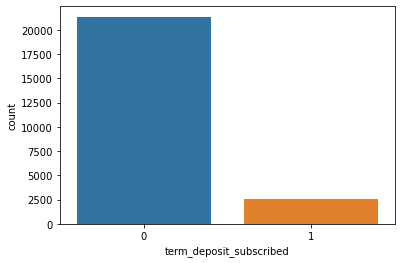

In [4]:
sns.countplot(data['term_deposit_subscribed'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23880 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23880 non-null  object 
 1   customer_age                23403 non-null  float64
 2   job_type                    23880 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23880 non-null  object 
 5   default                     23880 non-null  object 
 6   balance                     23603 non-null  float64
 7   housing_loan                23880 non-null  object 
 8   personal_loan               23767 non-null  object 
 9   communication_type          23880 non-null  object 
 10  day_of_month                23880 non-null  int64  
 11  month                       23880 non-null  object 
 12  last_contact_duration       23880 non-null  int64  
 13  num_contacts_in_campaign    237

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,23403.0,40.394821,10.753045,18.0,32.0,38.0,48.0,93.0
balance,23603.0,1363.966106,3019.583085,-8020.0,71.0,443.0,1410.5,98419.0
day_of_month,23880.0,15.796315,8.321136,1.0,8.0,16.0,21.0,31.0
last_contact_duration,23880.0,854.879648,74.537616,661.0,809.0,871.0,897.0,1019.0
num_contacts_in_campaign,23784.0,2.775353,3.148117,1.0,1.0,2.0,3.0,63.0
num_contacts_prev_campaign,23880.0,0.583836,2.624465,0.0,0.0,0.0,0.0,275.0
term_deposit_subscribed,23880.0,0.106198,0.308097,0.0,0.0,0.0,0.0,1.0


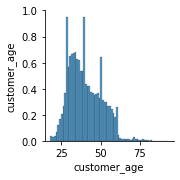

In [7]:
sns.pairplot(data[['customer_age']])

In [8]:
#customer age is skewed .
#other column is not that much skewed and they are manageable


<AxesSubplot:>

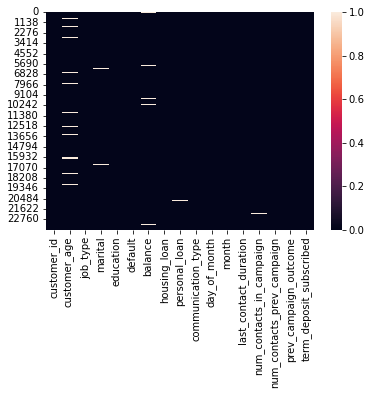

In [9]:
sns.heatmap(data.isnull())

In [10]:
data = data.dropna(subset = ['marital'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23773 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23773 non-null  object 
 1   customer_age                23300 non-null  float64
 2   job_type                    23773 non-null  object 
 3   marital                     23773 non-null  object 
 4   education                   23773 non-null  object 
 5   default                     23773 non-null  object 
 6   balance                     23500 non-null  float64
 7   housing_loan                23773 non-null  object 
 8   personal_loan               23660 non-null  object 
 9   communication_type          23773 non-null  object 
 10  day_of_month                23773 non-null  int64  
 11  month                       23773 non-null  object 
 12  last_contact_duration       23773 non-null  int64  
 13  num_contacts_in_campaign    236

# Treating Null value 

#Treating Customer age column on the basis of their job type.

<AxesSubplot:xlabel='job_type', ylabel='customer_age'>

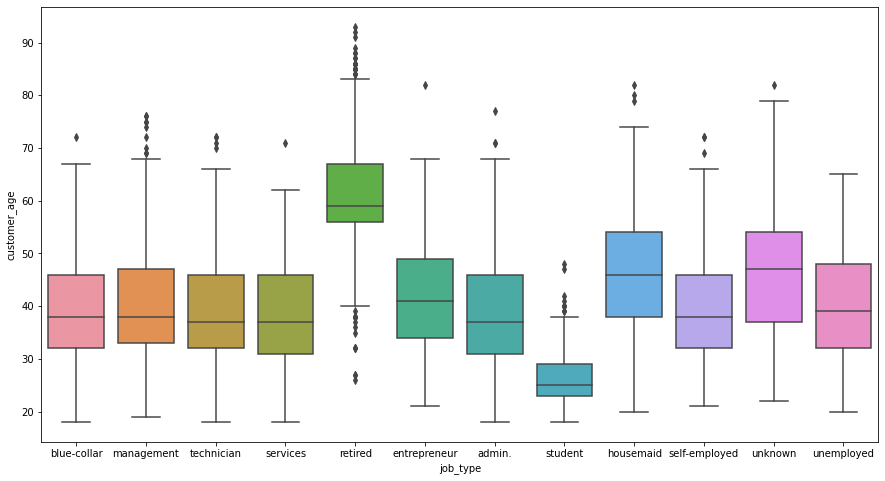

In [11]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'job_type', y = 'customer_age', data = data)

In [12]:
def age(cols):
    age = cols[0]
    jobtype = cols[1]
    
    if pd.isnull(age):
        
        if jobtype  in ['blue-collar','management','technician','service']:
            return 38
        elif jobtype == 'retired':
            return 60
        elif jobtype == 'enterpreneur':
            return 40
        elif jobtype == 'admin':
            return 36
        elif jobtype == 'student':
            return 25
        elif jobtype in ['housesmaid','unknown']:
            return 45
        else :
            return 38
    
    else:
        return age 
    

In [13]:
data['customer_age'] = data[['customer_age','job_type']].apply(age,axis = 1)

#Droping remaing null values.


<AxesSubplot:>

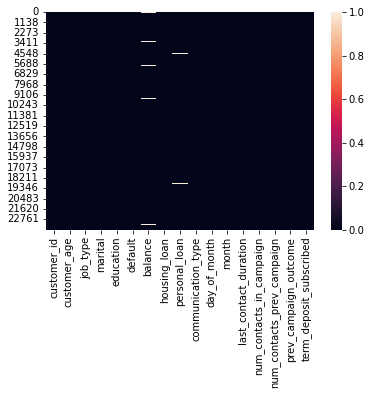

In [14]:
sns.heatmap(data.isnull())

In [15]:
 data.dropna(inplace = True)

<AxesSubplot:>

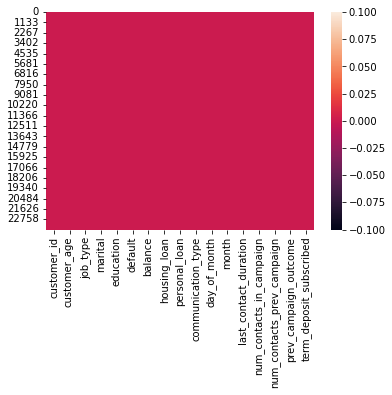

In [16]:
sns.heatmap(data.isnull())

# Treating categorical variable.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23291 entries, 0 to 23879
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 23291 non-null  object 
 1   customer_age                23291 non-null  float64
 2   job_type                    23291 non-null  object 
 3   marital                     23291 non-null  object 
 4   education                   23291 non-null  object 
 5   default                     23291 non-null  object 
 6   balance                     23291 non-null  float64
 7   housing_loan                23291 non-null  object 
 8   personal_loan               23291 non-null  object 
 9   communication_type          23291 non-null  object 
 10  day_of_month                23291 non-null  int64  
 11  month                       23291 non-null  object 
 12  last_contact_duration       23291 non-null  int64  
 13  num_contacts_in_campaign    232

In [18]:
Transdata = pd.get_dummies(data,columns = ['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'], drop_first = True)
Transdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23291 entries, 0 to 23879
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    23291 non-null  object 
 1   customer_age                   23291 non-null  float64
 2   balance                        23291 non-null  float64
 3   day_of_month                   23291 non-null  int64  
 4   last_contact_duration          23291 non-null  int64  
 5   num_contacts_in_campaign       23291 non-null  float64
 6   num_contacts_prev_campaign     23291 non-null  int64  
 7   term_deposit_subscribed        23291 non-null  int64  
 8   job_type_blue-collar           23291 non-null  uint8  
 9   job_type_entrepreneur          23291 non-null  uint8  
 10  job_type_housemaid             23291 non-null  uint8  
 11  job_type_management            23291 non-null  uint8  
 12  job_type_retired               23291 non-null 

# seperate independent and dependent feature.

In [19]:
y = Transdata[['term_deposit_subscribed']]

In [20]:
y.head()

,term_deposit_subscribed
0,0
1,0
2,1
4,0
5,0


In [21]:
x = Transdata.drop(['term_deposit_subscribed','customer_id'],axis = 1)

In [22]:
x.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,34.0,934.0,18,704,2.0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,41.0,1352.0,13,893,2.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,57.0,495.0,18,796,4.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,29.0,265.0,19,795,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50.0,407.0,7,807,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
y.shape

(23291, 1)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [26]:
x_train.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'job_type_blue-collar', 'job_type_entrepreneur', 'job_type_housemaid',
       'job_type_management', 'job_type_retired', 'job_type_self-employed',
       'job_type_services', 'job_type_student', 'job_type_technician',
       'job_type_unemployed', 'job_type_unknown', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_loan_yes',
       'personal_loan_yes', 'communication_type_telephone',
       'communication_type_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'prev_campaign_outcome_other',
       'prev_campaign_outcome_success', 'prev_campaign_outcome_unknown'],
      dtype='object')

In [27]:
from sklearn.linear_model import LogisticRegressionCV

In [28]:
log_model = LogisticRegressionCV()

In [29]:
log_model.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegressionCV()

In [30]:
ypred = log_model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy = accuracy_score(y_test,ypred)
accuracy

0.9056954779622209

In [33]:
x_test.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
13222,40.0,548.0,12,863,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
20834,35.0,498.0,14,800,4.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
18545,36.0,863.0,8,898,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13917,54.0,286.0,3,992,4.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14727,33.0,9633.0,7,746,2.0,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [34]:
result = pd.DataFrame(x_test)

In [35]:
result.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
13222,40.0,548.0,12,863,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
20834,35.0,498.0,14,800,4.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
18545,36.0,863.0,8,898,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13917,54.0,286.0,3,992,4.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14727,33.0,9633.0,7,746,2.0,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [36]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 13222 to 6559
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_age                   6988 non-null   float64
 1   balance                        6988 non-null   float64
 2   day_of_month                   6988 non-null   int64  
 3   last_contact_duration          6988 non-null   int64  
 4   num_contacts_in_campaign       6988 non-null   float64
 5   num_contacts_prev_campaign     6988 non-null   int64  
 6   job_type_blue-collar           6988 non-null   uint8  
 7   job_type_entrepreneur          6988 non-null   uint8  
 8   job_type_housemaid             6988 non-null   uint8  
 9   job_type_management            6988 non-null   uint8  
 10  job_type_retired               6988 non-null   uint8  
 11  job_type_self-employed         6988 non-null   uint8  
 12  job_type_services              6988 non-null

In [37]:
y_test.head()

,term_deposit_subscribed
13222,0
20834,0
18545,0
13917,0
14727,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term_deposit_subscribed', ylabel='count'>

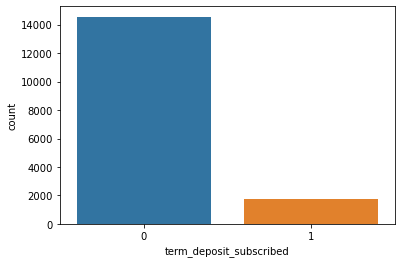

In [38]:
sns.countplot('term_deposit_subscribed',data = y_train)

# Loading new data to predict their output

In [39]:
newdata = pd.read_excel('New_customer_list_data.xlsx')

In [40]:
newdata.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [41]:
newdata.shape

(7767, 16)

In [42]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7767 non-null   object 
 1   customer_age                7625 non-null   float64
 2   job_type                    7767 non-null   object 
 3   marital                     7724 non-null   object 
 4   education                   7767 non-null   object 
 5   default                     7767 non-null   object 
 6   balance                     7645 non-null   float64
 7   housing_loan                7767 non-null   object 
 8   personal_loan               7731 non-null   object 
 9   communication_type          7767 non-null   object 
 10  last_contact_duration       7767 non-null   int64  
 11  day_of_month                7767 non-null   int64  
 12  month                       7767 non-null   object 
 13  num_contacts_in_campaign    7751 

In [43]:
pd.isnull(newdata).sum()

customer_id                     0
customer_age                  142
job_type                        0
marital                        43
education                       0
default                         0
balance                       122
housing_loan                    0
personal_loan                  36
communication_type              0
last_contact_duration           0
day_of_month                    0
month                           0
num_contacts_in_campaign       16
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

<AxesSubplot:xlabel='job_type', ylabel='customer_age'>

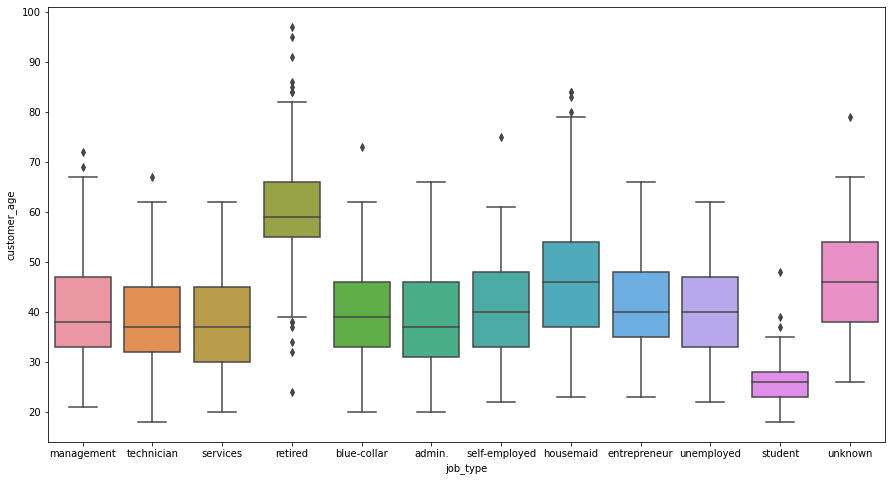

In [44]:
plt.figure(figsize = (15,8))
sns.boxplot(x = 'job_type', y = 'customer_age', data = newdata)

<Figure size 1080x576 with 0 Axes>

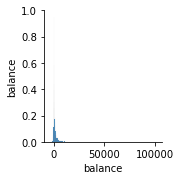

In [45]:
plt.figure(figsize = (15,8))
sns.pairplot(newdata[['balance']])

<AxesSubplot:>

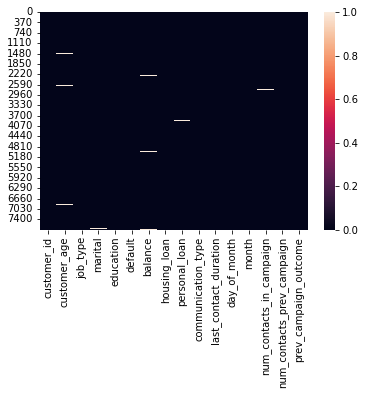

In [46]:
sns.heatmap(pd.isnull(newdata))

In [47]:
newdata['customer_age'] = newdata[['customer_age','job_type']].apply(age,axis = 1)

<AxesSubplot:>

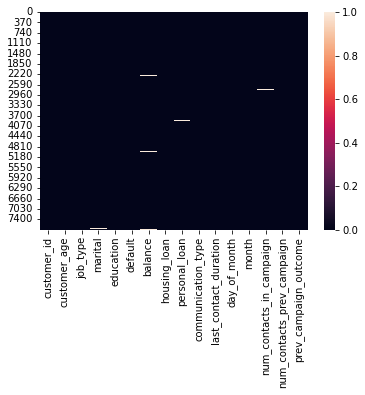

In [48]:
sns.heatmap(pd.isnull(newdata))

In [49]:
newdata.dropna(inplace = True)

<AxesSubplot:>

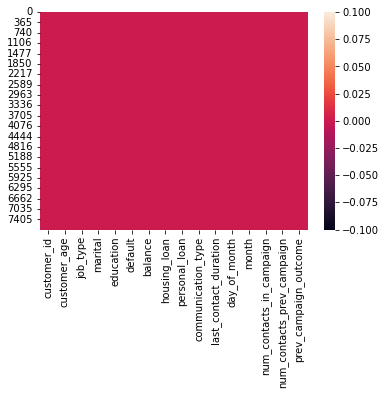

In [50]:
sns.heatmap(pd.isnull(newdata))

In [51]:
newdata.describe()

,customer_age,balance,last_contact_duration,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign
count,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000
mean,40.542505,1379.902807,854.295948,15.886388,2.787076,0.617452
std,10.673421,3286.176397,74.677203,8.327368,3.177352,2.081565
min,18.000000,-4062.000000,663.000000,1.000000,1.000000,0.000000
25%,32.000000,74.000000,809.000000,8.000000,1.000000,0.000000
50%,38.000000,467.000000,870.000000,16.000000,2.000000,0.000000
75%,48.000000,1429.500000,897.000000,21.000000,3.000000,0.000000
max,97.000000,102128.000000,1020.000000,31.000000,46.000000,55.000000


In [52]:
newdata.shape

(7552, 16)

In [53]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7552 entries, 0 to 7766
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7552 non-null   object 
 1   customer_age                7552 non-null   float64
 2   job_type                    7552 non-null   object 
 3   marital                     7552 non-null   object 
 4   education                   7552 non-null   object 
 5   default                     7552 non-null   object 
 6   balance                     7552 non-null   float64
 7   housing_loan                7552 non-null   object 
 8   personal_loan               7552 non-null   object 
 9   communication_type          7552 non-null   object 
 10  last_contact_duration       7552 non-null   int64  
 11  day_of_month                7552 non-null   int64  
 12  month                       7552 non-null   object 
 13  num_contacts_in_campaign    7552 

In [54]:
transnewdata = pd.get_dummies(newdata, columns =['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'], drop_first = True)

In [55]:
transnewdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7552 entries, 0 to 7766
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    7552 non-null   object 
 1   customer_age                   7552 non-null   float64
 2   balance                        7552 non-null   float64
 3   last_contact_duration          7552 non-null   int64  
 4   day_of_month                   7552 non-null   int64  
 5   num_contacts_in_campaign       7552 non-null   float64
 6   num_contacts_prev_campaign     7552 non-null   int64  
 7   job_type_blue-collar           7552 non-null   uint8  
 8   job_type_entrepreneur          7552 non-null   uint8  
 9   job_type_housemaid             7552 non-null   uint8  
 10  job_type_management            7552 non-null   uint8  
 11  job_type_retired               7552 non-null   uint8  
 12  job_type_self-employed         7552 non-null   u

In [56]:
xnew = transnewdata.drop('customer_id',axis = 1)

In [57]:
xnew = xnew[['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'job_type_blue-collar', 'job_type_entrepreneur', 'job_type_housemaid',
       'job_type_management', 'job_type_retired', 'job_type_self-employed',
       'job_type_services', 'job_type_student', 'job_type_technician',
       'job_type_unemployed', 'job_type_unknown', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_loan_yes',
       'personal_loan_yes', 'communication_type_telephone',
       'communication_type_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'prev_campaign_outcome_other',
       'prev_campaign_outcome_success', 'prev_campaign_outcome_unknown']]

In [60]:
xnew.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,28.0,285.0,26,849,4.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,46.0,656.0,5,990,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,34.0,2.0,20,886,3.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,65.0,2880.0,23,913,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,52.0,1779.0,19,703,3.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
ynewpred = (log_model.predict_proba(xnew)[:,1]>=0.17).astype(int)

In [78]:
ynewpred

array([0, 0, 0, ..., 1, 0, 1])

In [79]:
outcometermdeposit =pd.DataFrame(ynewpred)

In [80]:
outcometermdeposit.head()

,0
0,0
1,0
2,0
3,1
4,0


In [81]:
type(xnew)

pandas.core.frame.DataFrame

In [82]:
newdata['term_deposit_outcome'] = ynewpred

In [83]:
newdata.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_outcome
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown,0
1,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown,0
2,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown,0
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown,1
4,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure,0


In [85]:
finaloutput = newdata[newdata['term_deposit_outcome'] == 1]

In [91]:
finaloutput.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_outcome
3,id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown,1
9,id_13459,30.0,self-employed,married,secondary,no,580.0,yes,no,cellular,740,13,oct,1.0,6,failure,1
36,id_5003,21.0,student,single,secondary,no,4127.0,no,no,cellular,931,5,apr,4.0,7,failure,1
38,id_31092,46.0,self-employed,married,secondary,no,1563.0,no,no,cellular,668,24,dec,3.0,3,failure,1
40,id_15029,45.0,management,married,tertiary,no,0.0,no,no,cellular,859,16,jun,2.0,0,unknown,1


In [89]:
onlycustid = finaloutput[['customer_id']]

In [90]:
onlycustid.to_csv('final.csv')